In [110]:
import numpy as np
import matplotlib.pyplot as plt


In [111]:
def sigmoid(x,k=0.5,x0=1.0):
    return 1./(1.+np.exp(-k*(x-x0)))

In [143]:
# A simple example set
t = np.linspace(0,20,50)
p = sigmoid(t,k=0.5,x0=9)
#t_samples = []



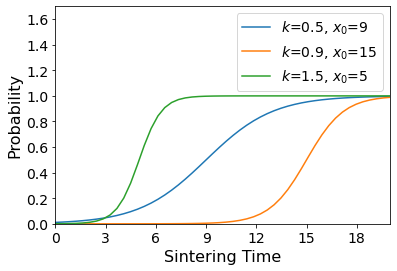

In [133]:
plt.plot(t,sigmoid(t,k=0.5,x0=9),label="$k$=0.5, $x_0$=9")
plt.plot(t,sigmoid(t,k=0.9,x0=15),label="$k$=0.9, $x_0$=15")
plt.plot(t,sigmoid(t,k=1.5,x0=5),label="$k$=1.5, $x_0$=5")

#plt.scatter(t_data,out_data)
plt.xlabel('Sintering Time',fontsize=16)
plt.ylabel('Probability',fontsize=16)
plt.xticks([0,3,6,9,12,15,18,21],fontsize=14)
plt.yticks(fontsize=14)
plt.ylim([0,1.7])
plt.xlim([0,20])
plt.legend(fontsize=14)

plt.savefig('class_log_function_1d.png',bbox_inches='tight',facecolor='white',edgecolor='white',transparent=False)
plt.show()

In [160]:
t_exp = [2,5,8,11,14,17,20]
t_data = []
out_data = []
for time in t_exp:
    pi = np.random.rand(5)
    dt = np.random.randn(5)
    for i in range(5):
        t_data.append(time+dt[i])
        if pi[i] < sigmoid(time+dt[i],k=0.5,x0=9):
            out_data.append(1.0)
        else:
            out_data.append(0.0)

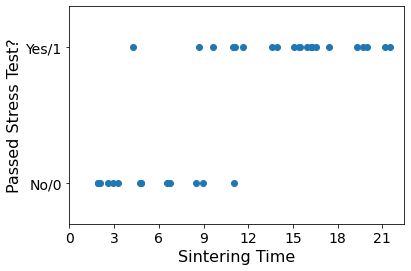

In [161]:
plt.scatter(t_data,out_data)
plt.xlabel('Sintering Time',fontsize=16)
plt.ylabel('Passed Stress Test?',fontsize=16)
plt.xticks([0,3,6,9,12,15,18,21],fontsize=14)
plt.yticks([0.,1.],['No/0','Yes/1'],fontsize=14)
plt.ylim([-0.3,1.3])

plt.savefig('class_data_1d.png',bbox_inches='tight',facecolor='white',edgecolor='white',transparent=False)
plt.show()

In [162]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

from sklearn.model_selection import train_test_split 

In [163]:
X_train, X_test, y_train, y_test = train_test_split(t_data, out_data, test_size=0.33, random_state=42)

In [164]:
class LogisticRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)     
    def forward(self, x):
        outputs = torch.sigmoid(self.linear(x))
        return outputs

In [165]:
epochs = 20000
input_dim = 1 # Two inputs x1 and x2 
output_dim = 1 # Single binary output 
learning_rate = 0.01

In [166]:
model = LogisticRegression(input_dim,output_dim)

In [167]:
model(torch.Tensor([1.0]))

tensor([0.1721], grad_fn=<SigmoidBackward>)

In [168]:
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

X_train, X_test = torch.Tensor(X_train),torch.Tensor(X_test)
y_train, y_test = torch.Tensor(y_train),torch.Tensor(y_test)

X_train = X_train.unsqueeze(1)
print(X_train.shape)

X_test = X_test.unsqueeze(1)

torch.Size([23, 1])


In [169]:
losses = []
losses_test = []
Iterations = []
iter = 0
for epoch in range(int(epochs)):
    x = X_train
    labels = y_train
    optimizer.zero_grad() # Setting our stored gradients equal to zero
    outputs = model(X_train)
    loss = criterion(torch.squeeze(outputs), labels) 
    
    loss.backward() # Computes the gradient of the given tensor w.r.t. the weights/bias
    
    optimizer.step() # Updates weights and biases with the optimizer (SGD)
    
    iter+=1
    if iter%1000==0:
        with torch.no_grad():
            # Calculating the loss and accuracy for the test dataset
            correct_test = 0
            total_test = 0
            outputs_test = torch.squeeze(model(X_test))
            loss_test = criterion(outputs_test, y_test)
            
            predicted_test = outputs_test.round().detach().numpy()
            total_test += y_test.size(0)
            correct_test += np.sum(predicted_test == y_test.detach().numpy())
            accuracy_test = 100 * correct_test/total_test
            losses_test.append(loss_test.item())
            
            # Calculating the loss and accuracy for the train dataset
            total = 0
            correct = 0
            total += y_train.size(0)
            correct += np.sum(torch.squeeze(outputs).round().detach().numpy() == y_train.detach().numpy())
            accuracy = 100 * correct/total
            losses.append(loss.item())
            Iterations.append(iter)
            
            print(f"Iteration: {iter}. \nTest - Loss: {loss_test.item()}. Accuracy: {accuracy_test}")
            print(f"Train -  Loss: {loss.item()}. Accuracy: {accuracy}\n")

Iteration: 1000. 
Test - Loss: 0.41152894496917725. Accuracy: 83.33333333333333
Train -  Loss: 0.29133671522140503. Accuracy: 86.95652173913044

Iteration: 2000. 
Test - Loss: 0.3853680193424225. Accuracy: 83.33333333333333
Train -  Loss: 0.25120311975479126. Accuracy: 91.30434782608695

Iteration: 3000. 
Test - Loss: 0.37154731154441833. Accuracy: 83.33333333333333
Train -  Loss: 0.23172298073768616. Accuracy: 91.30434782608695

Iteration: 4000. 
Test - Loss: 0.3633246123790741. Accuracy: 83.33333333333333
Train -  Loss: 0.22085465490818024. Accuracy: 91.30434782608695

Iteration: 5000. 
Test - Loss: 0.3580349385738373. Accuracy: 83.33333333333333
Train -  Loss: 0.21421685814857483. Accuracy: 91.30434782608695

Iteration: 6000. 
Test - Loss: 0.3544415533542633. Accuracy: 83.33333333333333
Train -  Loss: 0.20990276336669922. Accuracy: 91.30434782608695

Iteration: 7000. 
Test - Loss: 0.35190102458000183. Accuracy: 83.33333333333333
Train -  Loss: 0.20697021484375. Accuracy: 91.30434782

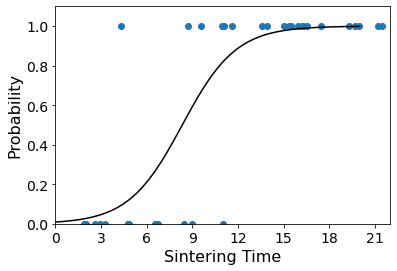

In [177]:
t_tensor = torch.Tensor(t).unsqueeze(1)
#plt.plot(t,p)
plt.plot(t,model(t_tensor).detach().numpy(),c='k')
plt.scatter(t_data,out_data)

plt.xlabel('Sintering Time',fontsize=16)
plt.ylabel('Probability',fontsize=16)
plt.xticks([0,3,6,9,12,15,18,21],fontsize=14)
plt.yticks(fontsize=14)
plt.ylim([-0.0,1.1])
plt.xlim([0,22])

plt.savefig('class_log_reg_1d.png',bbox_inches='tight',facecolor='white',edgecolor='white',transparent=False)
plt.show()

In [195]:
from sklearn import datasets

In [197]:
iris = datasets.load_iris()
X = iris.data  # we only take the first two features.
y = iris.target


In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



In [250]:
class IrisNet(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(IrisNet, self).__init__()
        self.linear1 = torch.nn.Linear(input_dim, 8,bias=False) 
        self.linear2 = torch.nn.Linear(8, 8,bias=False)     
        self.linear3 = torch.nn.Linear(8, output_dim,bias=False)     

    def forward(self, x):
        h = torch.sigmoid(self.linear1(x))
        h = torch.sigmoid(self.linear2(h))
        outputs = self.linear3(h)
        return outputs

In [251]:
epochs = 2000
input_dim = 4 # Iris Data 
output_dim = 3 # Classes 
learning_rate = 0.01

In [252]:
print(y_test)

tensor([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2,
        2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2,
        1, 2])


In [253]:
model = IrisNet(input_dim,output_dim)

In [254]:
model(torch.Tensor([1.0,-1.0,0.4,0.2]))

tensor([ 0.4387,  0.1644, -0.0796], grad_fn=<SqueezeBackward3>)

In [255]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

X_train, X_test = torch.Tensor(X_train),torch.Tensor(X_test)
y_train, y_test = torch.tensor(y_train,dtype=torch.long),torch.tensor(y_test,dtype=torch.long)

#X_train = X_train.unsqueeze(1)
#print(X_train.shape)

#X_test = X_test.unsqueeze(1)

<ipython-input-255-ef279eadc1a3>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train, y_test = torch.tensor(y_train,dtype=torch.long),torch.tensor(y_test,dtype=torch.long)


In [256]:
losses = []
losses_test = []
Iterations = []
iter = 0
for epoch in range(int(epochs)):
    x = X_train
    labels = y_train
    optimizer.zero_grad() # Setting our stored gradients equal to zero
    outputs = model(X_train)
    loss = criterion(outputs, labels) 
    
    loss.backward() # Computes the gradient of the given tensor w.r.t. the weights/bias
    
    optimizer.step() # Updates weights and biases with the optimizer (SGD)
    
    iter+=1
    if iter%100==0:
        with torch.no_grad():
            # Calculating the loss and accuracy for the test dataset
            correct_test = 0
            total_test = 0
            outputs_test = model(X_test)
            loss_test = criterion(outputs_test, y_test)
            
            predicted_test = np.argmax(torch.softmax(model(X_test),-1).detach().numpy(),axis=1)
            total_test += y_test.size(0)
            correct_test += np.sum(predicted_test == y_test.detach().numpy())
            accuracy_test = 100 * correct_test/total_test
            losses_test.append(loss_test.item())
            
            # Calculating the loss and accuracy for the train dataset
            total = 0
            correct = 0
            total += y_train.size(0)
            correct += np.sum(np.argmax(torch.softmax(model(X_train),-1).detach().numpy(),axis=1) == y_train.detach().numpy())
            accuracy = 100 * correct/total
            losses.append(loss.item())
            Iterations.append(iter)
            
            print(f"Iteration: {iter}. \nTest - Loss: {loss_test.item()}. Accuracy: {accuracy_test}")
            print(f"Train -  Loss: {loss.item()}. Accuracy: {accuracy}\n")

Iteration: 100. 
Test - Loss: 1.088529348373413. Accuracy: 30.0
Train -  Loss: 1.0836327075958252. Accuracy: 35.0

Iteration: 200. 
Test - Loss: 1.0534937381744385. Accuracy: 68.0
Train -  Loss: 1.0531444549560547. Accuracy: 68.0

Iteration: 300. 
Test - Loss: 0.9281149506568909. Accuracy: 72.0
Train -  Loss: 0.9430347681045532. Accuracy: 69.0

Iteration: 400. 
Test - Loss: 0.655458390712738. Accuracy: 76.0
Train -  Loss: 0.6954009532928467. Accuracy: 70.0

Iteration: 500. 
Test - Loss: 0.496256947517395. Accuracy: 90.0
Train -  Loss: 0.5411523580551147. Accuracy: 87.0

Iteration: 600. 
Test - Loss: 0.430210143327713. Accuracy: 98.0
Train -  Loss: 0.47354304790496826. Accuracy: 93.0

Iteration: 700. 
Test - Loss: 0.3764429986476898. Accuracy: 98.0
Train -  Loss: 0.4157518744468689. Accuracy: 96.0

Iteration: 800. 
Test - Loss: 0.32496726512908936. Accuracy: 98.0
Train -  Loss: 0.358730673789978. Accuracy: 97.0

Iteration: 900. 
Test - Loss: 0.28063586354255676. Accuracy: 98.0
Train -  

In [261]:
print(y_test)
print(np.argmax(torch.softmax(model(X_test),-1).detach().numpy(),axis=1))
print(X_test[0])

tensor([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2,
        2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2,
        1, 2])
[1 0 2 1 1 0 1 2 2 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2]
tensor([6.1000, 2.8000, 4.7000, 1.2000])


In [257]:
for param in model.parameters():
    print(param.data)

tensor([[-0.1009, -1.0774,  1.2342,  0.7274],
        [-0.3335, -0.3729,  0.1612, -0.2220],
        [-0.4737, -1.2854,  1.0667,  1.2156],
        [ 0.5366,  0.3075,  0.2514,  0.0563],
        [ 0.2973,  0.5525, -0.7477, -0.5969],
        [-0.8349, -0.2249,  1.0374,  1.0274],
        [ 0.6713,  0.9673, -1.1505, -1.0221],
        [ 1.0097,  1.2464, -1.5759, -1.3365]])
tensor([[ 1.1209, -0.2504,  1.4306, -0.1424, -0.8774,  1.0193, -1.0367, -1.1012],
        [-0.9338, -0.3035, -0.7524, -0.0308,  0.2110, -0.3914,  1.1374,  1.4993],
        [-0.5971, -0.3039, -0.8982,  0.1666,  0.7635, -0.6994,  0.4282,  1.1786],
        [ 1.9834,  0.3096,  1.6695,  0.2383, -0.7626,  1.2219, -0.6681, -1.1668],
        [ 0.6291,  0.0090,  0.6529,  0.3016, -0.3088,  0.2626, -0.4803, -0.2400],
        [ 0.2621, -0.0769,  0.8214,  0.0296,  0.0116,  0.2017, -0.7108, -0.5249],
        [-1.1277,  0.3129, -1.4036,  0.0320,  0.5424, -0.7212,  0.9702,  1.7447],
        [-0.6927,  0.3747, -1.5479,  0.6612,  0.7999, -1.

[[19.  0.  0.]
 [ 0. 14.  1.]
 [ 0.  0. 16.]]


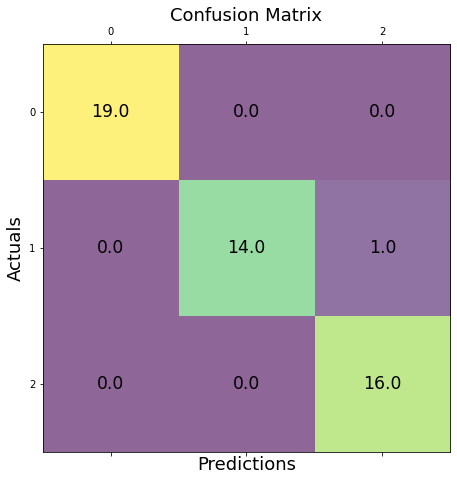

In [269]:
predicted_test = np.argmax(torch.softmax(model(X_test),-1).detach().numpy(),axis=1)
confusion_matrix = np.zeros((3,3))

#for i1 in range(3):
#    for i2 in range(3):
for i,y_i in enumerate(y_test):
    confusion_matrix[y_i,predicted_test[i]] += 1
print(confusion_matrix)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(confusion_matrix, alpha=0.6)
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        ax.text(x=j, y=i,s=confusion_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.savefig('class_iris_confusion.png',bbox_inches='tight',facecolor='white',edgecolor='white',transparent=False)

plt.show()

            

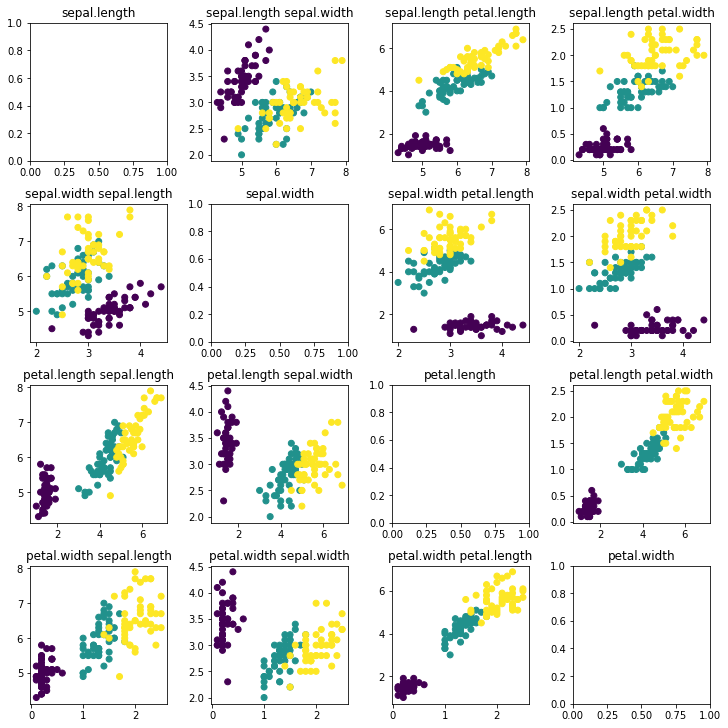

In [238]:
fig = plt.figure(constrained_layout=True,frameon=False,figsize=(10,10))

ax_dict = fig.subplot_mosaic(
    [
        ["sepal.length",              "sepal.length sepal.width", "sepal.length petal.length", "sepal.length petal.width"],
        ["sepal.width sepal.length",  "sepal.width",              "sepal.width petal.length",  "sepal.width petal.width"],
        ["petal.length sepal.length", "petal.length sepal.width", "petal.length",              "petal.length petal.width"],
        ["petal.width sepal.length",  "petal.width sepal.width",  "petal.width petal.length",  "petal.width"],
    ],
)

#ax_dict["sepal.length"].scatter(X[:,0],X[:,0],c=y)
ax_dict["sepal.length sepal.width"].scatter(X[:,0],X[:,1],c=y)
ax_dict["sepal.length petal.length"].scatter(X[:,0],X[:,2],c=y)
ax_dict["sepal.length petal.width"].scatter(X[:,0],X[:,3],c=y)
ax_dict["sepal.width sepal.length"].scatter(X[:,1],X[:,0],c=y)
#ax_dict["sepal.width"].scatter(X[:,1],X[:,1],c=y)
ax_dict["sepal.width petal.length"].scatter(X[:,1],X[:,2],c=y)
ax_dict["sepal.width petal.width"].scatter(X[:,1],X[:,3],c=y)
ax_dict["petal.length sepal.length"].scatter(X[:,2],X[:,0],c=y)
ax_dict["petal.length sepal.width"].scatter(X[:,2],X[:,1],c=y)
#ax_dict["petal.length"].scatter(X[:,2],X[:,2],c=y)
ax_dict["petal.length petal.width"].scatter(X[:,2],X[:,3],c=y)
ax_dict["petal.width sepal.length"].scatter(X[:,3],X[:,0],c=y)
ax_dict["petal.width sepal.width"].scatter(X[:,3],X[:,1],c=y)
ax_dict["petal.width petal.length"].scatter(X[:,3],X[:,2],c=y)
#ax_dict["petal.width"].scatter(X[:,3],X[:,3],c=y)

for key in ax_dict.keys():
    #ax_dict[key].axis('off')
    ax_dict[key].set_title(key)
    #ax_dict[key].set_aspect('equal')

plt.savefig('Iris_dataset.png',bbox_inches='tight')
plt.show()

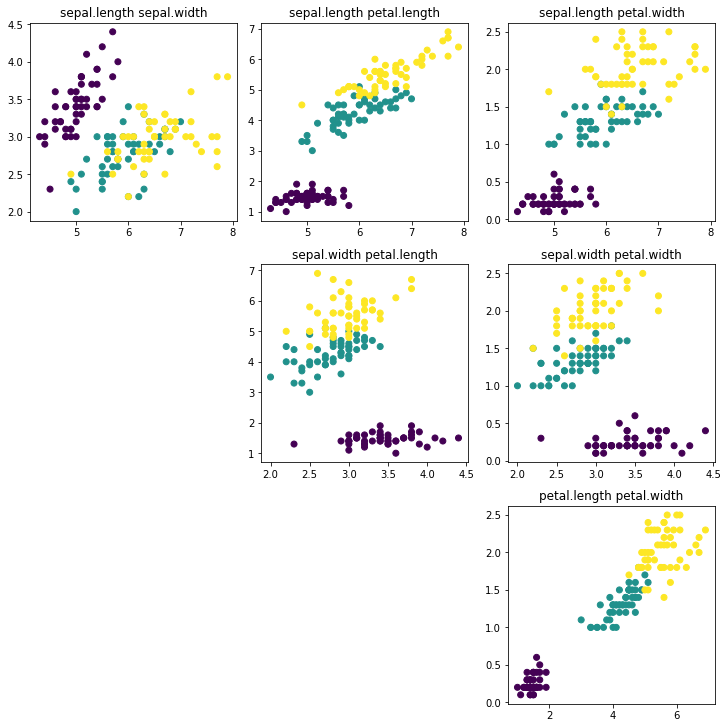

In [242]:
fig = plt.figure(constrained_layout=True,frameon=False,figsize=(10,10))

ax_dict = fig.subplot_mosaic(
    [
        ["sepal.length sepal.width", "sepal.length petal.length", "sepal.length petal.width"],
        ["x", "sepal.width petal.length", "sepal.width petal.width"],
        ["y", "z", "petal.length petal.width"],
    ],
)

#ax_dict["sepal.length"].scatter(X[:,0],X[:,0],c=y)
ax_dict["sepal.length sepal.width"].scatter(X[:,0],X[:,1],c=y)
ax_dict["sepal.length petal.length"].scatter(X[:,0],X[:,2],c=y)
ax_dict["sepal.length petal.width"].scatter(X[:,0],X[:,3],c=y)
#ax_dict["sepal.width sepal.length"].scatter(X[:,1],X[:,0],c=y)
#ax_dict["sepal.width"].scatter(X[:,1],X[:,1],c=y)
ax_dict["sepal.width petal.length"].scatter(X[:,1],X[:,2],c=y)
ax_dict["sepal.width petal.width"].scatter(X[:,1],X[:,3],c=y)
#ax_dict["petal.length sepal.length"].scatter(X[:,2],X[:,0],c=y)
#ax_dict["petal.length sepal.width"].scatter(X[:,2],X[:,1],c=y)
#ax_dict["petal.length"].scatter(X[:,2],X[:,2],c=y)
ax_dict["petal.length petal.width"].scatter(X[:,2],X[:,3],c=y)
#ax_dict["petal.width sepal.length"].scatter(X[:,3],X[:,0],c=y)
#ax_dict["petal.width sepal.width"].scatter(X[:,3],X[:,1],c=y)
#ax_dict["petal.width petal.length"].scatter(X[:,3],X[:,2],c=y)
#ax_dict["petal.width"].scatter(X[:,3],X[:,3],c=y)

for key in ax_dict.keys():
    #ax_dict[key].axis('off')
    ax_dict[key].set_title(key)
    #ax_dict[key].set_aspect('equal')

for key in ["x","y","z"]:
    ax_dict[key].axis('off')
    ax_dict[key].set_title(" ")
    ax_dict[key].set_aspect('equal')

plt.savefig('Iris_dataset.png',bbox_inches='tight')
plt.show()

In [178]:
from torchvision import datasets, transforms

In [179]:
transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
        ])
dataset1 = datasets.MNIST('../data', train=True, download=True,
                       transform=transform)
dataset2 = datasets.MNIST('../data', train=False,
                       transform=transform)
train_loader = torch.utils.data.DataLoader(dataset1)
test_loader  = torch.utils.data.DataLoader(dataset2)

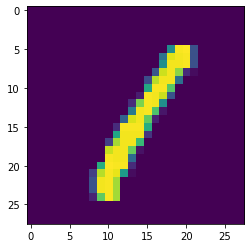

In [180]:
plt.imshow(dataset1[3][0].squeeze())
#plt.imshow(dataset1[0])

In [185]:
64**2

4096

In [192]:
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        #self.fc1 = nn.Linear(9216, 128)
        self.fc1 = nn.Linear(5408, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        #x = self.conv2(x)
        #x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output


def train(model, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        #data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 1000 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))


def test(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            #data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [193]:
model = Net()
optimizer = optim.Adadelta(model.parameters(), lr=1.0)

In [194]:
scheduler = StepLR(optimizer, step_size=1, gamma=0.7)
for epoch in range(1, 1 + 1):
    train(model, train_loader, optimizer, epoch)
    test(model, test_loader)
    scheduler.step()


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.469123
Train Epoch: 1 [1000/60000 (2%)]	Loss: 0.957907
Train Epoch: 1 [2000/60000 (3%)]	Loss: 2.529188
Train Epoch: 1 [3000/60000 (5%)]	Loss: 0.217311
Train Epoch: 1 [4000/60000 (7%)]	Loss: 0.002938
Train Epoch: 1 [5000/60000 (8%)]	Loss: 0.004725
Train Epoch: 1 [6000/60000 (10%)]	Loss: 0.000001
Train Epoch: 1 [7000/60000 (12%)]	Loss: 0.728695
Train Epoch: 1 [8000/60000 (13%)]	Loss: 0.003345
Train Epoch: 1 [9000/60000 (15%)]	Loss: 0.002800
Train Epoch: 1 [10000/60000 (17%)]	Loss: 0.000000
Train Epoch: 1 [11000/60000 (18%)]	Loss: 0.001082
Train Epoch: 1 [12000/60000 (20%)]	Loss: 0.022329
Train Epoch: 1 [13000/60000 (22%)]	Loss: 0.000091
Train Epoch: 1 [14000/60000 (23%)]	Loss: 0.001138
Train Epoch: 1 [15000/60000 (25%)]	Loss: 0.031856
Train Epoch: 1 [16000/60000 (27%)]	Loss: 0.000005
Train Epoch: 1 [17000/60000 (28%)]	Loss: 0.000014
Train Epoch: 1 [18000/60000 (30%)]	Loss: 0.001534
Train Epoch: 1 [19000/60000 (32%)]	Loss: 0.003260
Train Epoch: 1 [200

NameError: name 'device' is not defined